In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from util import ClusteringEnsamble

In [325]:
v_6182020 = pd.read_csv("../Datasets/Crop_Yield/Vegitative_Indices/2020/6182020_VIndices.csv")
v_6162021 = pd.read_csv("../Datasets/Crop_Yield/Vegitative_Indices/2021/6162021_VIndices.csv")
dry_yield_mass_2020 = pd.read_csv("../Datasets/Crop_Yield/Plots/interpolated/2020/int_dry_yld_mass_2020.csv")
elevation_2020 = pd.read_csv("../Datasets/Crop_Yield/Plots/interpolated/2020/int_elev_2020.csv")
v_6182020.drop(columns=['Unnamed: 0', 'Year', 'Date', 'Range', 'Row'], inplace=True)
v_6162021.drop(columns=['Unnamed: 0', 'Year', 'Date', 'Range', 'Row'], inplace=True)
v_6182020

,Plot,Red,Green,Blue,BI,GLI,NGRDI,VARI,BGI,ExG,ExR,ExB,ExGR,MGRVI,RGBVI,GRRI,VEG,Mean.Yld.bu.ac
0,1,39.832,49.734,33.297,41.508028,0.152604,0.110555,0.175976,0.669502,26.339,0.049086,-0.025379,26.289914,0.218441,0.301910,1.248594,1.325372,178.076035
1,10,31.155,43.468,27.467,34.710888,0.194520,0.165003,0.261112,0.631890,28.314,0.001459,-0.049115,28.312541,0.321259,0.376560,1.395217,1.454998,218.098259
2,100,29.002,39.506,24.811,31.714485,0.189716,0.153325,0.240383,0.628031,25.199,0.011753,-0.051121,25.187247,0.299607,0.368880,1.362182,1.434852,219.528599
3,1000,30.214,41.284,26.505,33.265445,0.185581,0.154830,0.246038,0.642016,25.849,0.010363,-0.042621,25.838637,0.302410,0.360670,1.366386,1.427298,234.371344
4,1001,37.434,47.021,31.010,39.046549,0.157540,0.113516,0.179381,0.659493,25.598,0.046651,-0.031239,25.551349,0.224144,0.311449,1.256104,1.337375,158.580044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,995,36.451,46.240,29.545,38.033845,0.167117,0.118380,0.184191,0.638949,26.484,0.042690,-0.043453,26.441310,0.233489,0.330067,1.268552,1.360462,224.324668
1336,996,34.938,45.598,29.331,37.238640,0.173203,0.132363,0.208183,0.643252,26.927,0.030175,-0.041274,26.896825,0.260168,0.339700,1.305112,1.383395,225.453358
1337,997,34.696,45.341,28.680,36.887943,0.177245,0.133001,0.207275,0.632540,27.306,0.029741,-0.047729,27.276259,0.261378,0.347678,1.306808,1.392358,224.299375
1338,998,31.723,42.520,26.917,34.345422,0.183742,0.145428,0.228141,0.633043,26.400,0.018705,-0.047807,26.381295,0.284832,0.358422,1.340352,1.415721,223.807176


In [321]:
def merge(data: dict):
    Crop_Yield = []
    Elevation = []

    for i in range(len(data['indices'])):
        row = data['indices'][data['indices'].index == i]
        plot = row['Plot'].values.astype(numpy.int32)[0]
        Crop_Yield.append(data['dry yield'][data['dry yield']['Plot'] == plot]['Extract_GALa2_dry_mass'].values[0])
        Elevation.append(data['elevation'][data['elevation']['Plot'] == plot]['Extract_elev_2020'].values[0])
    
    data['indices']['dry_yield_mass'] = Crop_Yield
    data['indices']['elevation'] = Elevation

In [337]:
data_6182020 = {
    'indices': v_6182020,
    'dry yield': dry_yield_mass_2020,
    'elevation': elevation_2020
}

data_6162021 = {
    'indices': v_6162021,
    'dry yield': dry_yield_mass_2020,
    'elevation': elevation_2020
}

merge(data_6182020)
merge(data_6162021)

v = pd.concat([data_6182020['indices'], data_6162021['indices']]).reset_index(drop=True)

v

,Plot,Red,Green,Blue,BI,GLI,NGRDI,VARI,BGI,ExG,ExR,ExB,ExGR,MGRVI,RGBVI,GRRI,VEG,Mean.Yld.bu.ac,dry_yield_mass,elevation
0,1,39.832,49.734,33.297,41.508028,0.152604,0.110555,0.175976,0.669502,26.339,0.049086,-0.025379,26.289914,0.218441,0.301910,1.248594,1.325372,178.076035,9881.252930,1155.380859
1,10,31.155,43.468,27.467,34.710888,0.194520,0.165003,0.261112,0.631890,28.314,0.001459,-0.049115,28.312541,0.321259,0.376560,1.395217,1.454998,218.098259,12222.727295,1154.186401
2,100,29.002,39.506,24.811,31.714485,0.189716,0.153325,0.240383,0.628031,25.199,0.011753,-0.051121,25.187247,0.299607,0.368880,1.362182,1.434852,219.528599,12463.730957,1154.231293
3,1000,30.214,41.284,26.505,33.265445,0.185581,0.154830,0.246038,0.642016,25.849,0.010363,-0.042621,25.838637,0.302410,0.360670,1.366386,1.427298,234.371344,13023.604736,1151.290283
4,1001,37.434,47.021,31.010,39.046549,0.157540,0.113516,0.179381,0.659493,25.598,0.046651,-0.031239,25.551349,0.224144,0.311449,1.256104,1.337375,158.580044,9459.528809,1157.193878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,995,77.141,102.080,66.583,83.275359,0.173725,0.139152,0.221408,0.652263,60.436,0.024074,-0.036060,60.411926,0.273018,0.339666,1.323291,1.389765,123.427725,12477.213135,1154.002930
2414,996,78.035,103.620,67.986,84.555035,0.173297,0.140844,0.225083,0.656109,61.219,0.022548,-0.033807,61.196452,0.276209,0.338591,1.327866,1.390243,158.548971,12301.001709,1153.383179
2415,997,79.179,103.930,68.726,85.233057,0.168524,0.135171,0.216387,0.661272,59.955,0.027481,-0.030630,59.927519,0.265491,0.329973,1.312596,1.375963,180.162714,12353.008057,1152.784424
2416,998,78.274,103.540,69.421,84.983579,0.167388,0.138966,0.224800,0.670475,59.385,0.024056,-0.025278,59.360944,0.272667,0.327259,1.322789,1.376730,181.559384,12566.253418,1152.221313


In [349]:
X = v.drop(columns=['Plot', 'dry_yield_mass'])
Y = v['dry_yield_mass']

scaler = MinMaxScaler()

scaleCols = [
    'Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
    'ExG', 'ExR', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG',
    'Mean.Yld.bu.ac', 'dry_yield_mass', 'elevation'
]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [11]:
def generate_similarity_matrix(clusters: numpy.ndarray):
    if isinstance(clusters, numpy.ndarray):
        size = len(clusters)
        sim_mat = []
    
        for i in range(size):
            if clusters[i] != -1:
                sim_mat.append((clusters == clusters[i]).astype(numpy.int32))
            else:
                temp = (numpy.zeros(size)).astype(numpy.int32)
                temp[i] = 1
                sim_mat.append(temp)
        return numpy.array(sim_mat)
    else:
        raise TypeError("Labels Must Be Of Type numpy.ndarray")

In [289]:
n = len(v)
sim_avg = numpy.zeros((n,n))
normal_labels = KMeans(n_clusters=4, random_state=20).fit(v).labels_
normal_labels
for i in v:
    temp = KMeans(n_clusters=4, random_state=31).fit(pd.DataFrame(v[i])).labels_
    sim_avg = sim_avg + generate_similarity_matrix(temp)

sim_avg = sim_avg / len(v.columns)
plt.imshow(sim_avg, cmap='binary')

Red
Green
Blue
BI
GLI
NGRDI
VARI
BGI
ExG
ExR
ExB
ExGR
MGRVI
RGBVI
GRRI
VEG


In [164]:
normal_labels = KMeans(n_clusters=4, random_state=20).fit(v).labels_
normal_labels
x = AgglomerativeClustering(metric='precomputed', n_clusters=4, linkage='complete').fit(1-sim_avg) 
ensamble_labels = x.labels_

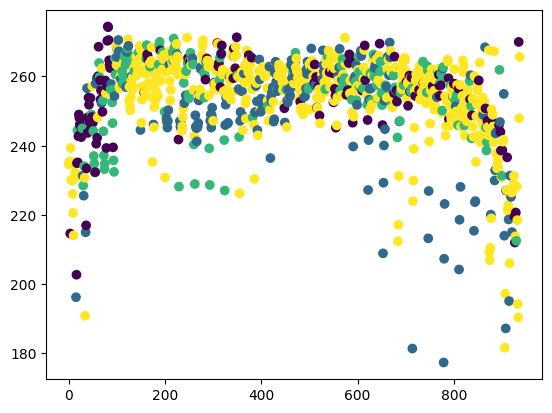

In [165]:
plt.scatter(range(len(v)), y, c=normal_labels)

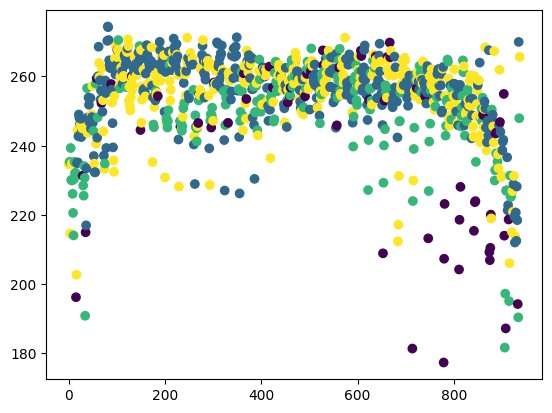

In [166]:
plt.scatter(range(len(v)), y, c=ensamble_labels)

In [284]:
model = RandomForestRegressor(random_state=29)
model.fit(v[['VARI', 'GRRI', 'NGRDI']], y)
model.score(v[['VARI', 'GRRI', 'NGRDI']], y)

0.8654150159602223

In [4]:
labels = []

labels.append(numpy.array([1,1,1,2,2,3,3]))
labels.append(numpy.array([2,2,2,3,3,1,1]))
labels.append(numpy.array([1,1,2,2,3,3,3]))
labels.append(numpy.array([1,2,-1,1,2,-1,-1]))

In [6]:
g = ClusteringEnsamble(n_clusters=3)

g.transform(labels)

array([2, 2, 2, 0, 0, 1, 1])